In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LinearRegression with mse loss
class LinearRegression:
    
    def __init__(self, eta=0.01, reg='l2', reg_coeff=0.01, n_iter=1000, th=1e-3 ):
        self.eta = eta
        self.reg = reg
        self.reg_coeff = reg_coeff
        self.n_iter = n_iter
        self.th = th
        self.w = None
        self.mse = None
        
    def fit(self, X, y):
        
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        N, D = X.shape
        
        self.w = np.zeros(D)
        self.mse = []
        
        for j in range(self.n_iter):
            err = 0
            for i in range(N):
                y_pred = np.dot(X[i],self.w)
                d = y_pred - y[i]
                
                if self.reg == 'l1':
                    dw = (np.dot(X[i].T,d) + self.reg_coeff * np.sign(self.w))
                else:
                    dw = (np.dot(X[i].T,d) + self.reg_coeff * self.w)
                    
                self.w -= self.eta * dw
                err+=np.square(d)
                
            self.mse.append(err/N)
            if j!=0:
                if (self.mse[j-1] - self.mse[j]) < self.th:
                    break
        
    def predict(self, X):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        return y_pred
    
    def metrics(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        d = y-y_pred
        mse=np.mean(d**2)
        mae=np.mean(abs(d))
        rmse=np.sqrt(mse)
        r2=1-(sum(d**2)/sum((y-np.mean(y))**2))
        print("MSE = {}".format(mse))
        print("MAE = {}".format(mae))
        print("RMSE = {}".format(rmse))
        print("R_squared = {}".format(r2))
        
    def score(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        d = y-y_pred
        r2 = 1-(sum(d**2)/sum((y-np.mean(y))**2))
        return r2
        
    def weights(self):
        return self.w
    
    def error(self):
        return np.array(self.mse)

In [3]:
# LinearRegression with mae loss
class LinearRegression2:
    
    def __init__(self, eta=0.01, reg='l2', reg_coeff=0.01, n_iter=1000, th=1e-3 ):
        self.eta = eta
        self.reg = reg
        self.reg_coeff = reg_coeff
        self.n_iter = n_iter
        self.th = th
        self.w = None
        self.mse = None
        
    def fit(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        N, D = X.shape
        
        self.w = np.zeros(D)
        self.mse = []
        
        for j in range(self.n_iter):
            err = 0
            for i in range(N):
                y_pred = np.dot(X[i],self.w)
                d = y_pred - y[i]  
                
                if self.reg == 'l1':
                    dw = np.sign(np.dot(X[i].T,d) + self.reg_coeff * np.sign(self.w))
                else:
                    dw = np.sign(np.dot(X[i].T,d) + self.reg_coeff * self.w)
                    
                self.w -= self.eta * dw    
                err+=np.square(d)
                
            self.mse.append(err/N)
            if j!=0:
                if (self.mse[j-1] - self.mse[j]) < self.th:
                    break
        
    def predict(self, X):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        return y_pred
    
    def metrics(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        d = y-y_pred
        mse=np.mean(d**2)
        mae=np.mean(abs(d))
        rmse=np.sqrt(mse)
        r2=1-(sum(d**2)/sum((y-np.mean(y))**2))
        print("MSE = {}".format(mse))
        print("MAE = {}".format(mae))
        print("RMSE = {}".format(rmse))
        print("R_squared = {}".format(r2))
        
    def score(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        d = y-y_pred
        r2 = 1-(sum(d**2)/sum((y-np.mean(y))**2))
        return r2
        
    def weights(self):
        return self.w
    
    def error(self):
        return np.array(self.mse)

In [4]:
df=pd.read_csv(r"Fish.csv")

In [5]:
X=df.iloc[:,df.columns !='Weight']
y=df.iloc[:,df.columns =='Weight']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 , random_state=100)

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder=OneHotEncoder(variables=['Species'] ,drop_last=True)
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
y_train=y_train.values
y_test=y_test.values

In [10]:
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)

In [11]:
clf = LinearRegression2()
clf.fit(X_train, y_train)
clf.metrics(X_test,y_test)

MSE = 14898.211568587518
MAE = 88.45949265901594
RMSE = 122.05823023699597
R_squared = 0.8610626645463968


In [12]:
w = clf.weights()
w

array([ 364.22,   72.26,   72.7 ,   69.64,  110.  ,   35.2 , -251.28,
       -274.7 , -192.56, -203.96, -156.44, -178.28])

In [13]:
mse = clf.error()
mse

array([291956.61890229, 291356.73835402, 290744.62707934, 290105.76882753,
       289471.63793566, 288842.23440372, 288217.55823172, 287597.60941964,
       286982.3879675 , 286371.8938753 , 285766.12714303, 285165.08777069,
       284568.77575829, 283977.19110582, 283393.30058114, 282797.65006059,
       282168.67896132, 281544.09169411, 280923.88825896, 280308.06865588,
       279647.41157709, 278987.97712832, 278332.62876106, 277681.36647531,
       277034.19027107, 276391.10014834, 275752.09610712, 275117.17814741,
       274466.82199393, 273786.68845321, 273110.38902076, 272437.92369658,
       271770.64568477, 271084.28398699, 270381.16067651, 269615.89515218,
       268853.78922395, 268058.86503057, 267196.33720719, 266336.55229175,
       265480.05136479, 264626.8344263 , 263776.90147629, 262930.25251476,
       262086.8875417 , 261246.80655712, 260410.00956102, 259576.49655339,
       258746.26753424, 257919.32250357, 257095.66146137, 256275.28440765,
       255458.19134241, 2

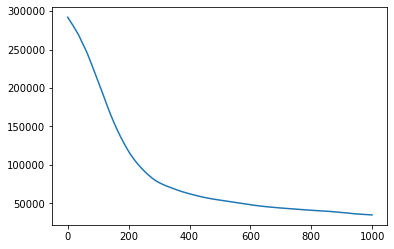

In [14]:
plt.plot(mse)

### Effect of n_iter on Linear Regression

In [15]:
train=[]
test=[]
for i in range(100,1001,100):
    print('For i =',i)
    clf = LinearRegression2(n_iter = i)
    clf.fit(X_train,y_train)
    print('Training Score =',clf.score(X_train,y_train))
    print('Testing Score =',clf.score(X_test,y_test))
    train.append(round(clf.score(X_train,y_train),3))
    test.append(round(clf.score(X_test,y_test),3))
    print('***************************************************')

For i = 100
Training Score = -0.5380511738512908
Testing Score = -0.6364288894623278
***************************************************
For i = 200
Training Score = 0.13302174830523328
Testing Score = 0.20158359568613105
***************************************************
For i = 300
Training Score = 0.4334104100697165
Testing Score = 0.5266274692339342
***************************************************
For i = 400
Training Score = 0.5402599649122046
Testing Score = 0.6229151801182895
***************************************************
For i = 500
Training Score = 0.600590992252178
Testing Score = 0.6831571049493582
***************************************************
For i = 600
Training Score = 0.6453844604386314
Testing Score = 0.7318362692610774
***************************************************
For i = 700
Training Score = 0.6761230142791586
Testing Score = 0.7759040545782421
***************************************************
For i = 800
Training Score = 0.697641130529294
Testi

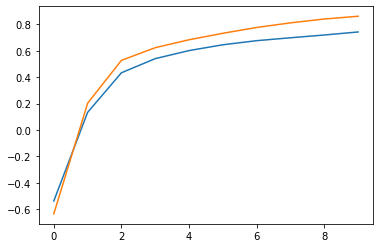

In [16]:
plt.plot(train)
plt.plot(test)

### Effect of type of regularization on model

In [17]:
train=[]
test=[]
reg = ['l1','l2']
for i in reg:
    print('For reg =',i)
    clf = LinearRegression2(reg = i)
    clf.fit(X_train,y_train)
    print('Training Score =',clf.score(X_train,y_train))
    print('Testing Score =',clf.score(X_test,y_test))
    train.append(round(clf.score(X_train,y_train),3))
    test.append(round(clf.score(X_test,y_test),3))
    print('***************************************************')

For reg = l1
Training Score = 0.7100174041435146
Testing Score = 0.8330407864431612
***************************************************
For reg = l2
Training Score = 0.7422619784025053
Testing Score = 0.8610626645463968
***************************************************


### Effect of outliers on linear regression of mae vs mse loss

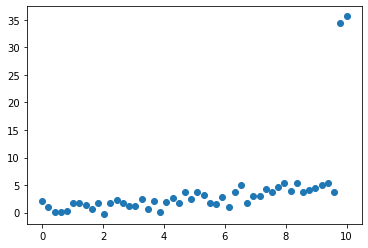

In [18]:
N = 50

# generate the data
X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# make outliers
Y[-1] += 30
Y[-2] += 30

# plot the data
plt.scatter(X, Y)
plt.show()

In [19]:
X.shape,Y.shape

((50,), (50,))

In [20]:
clf1 = LinearRegression()
clf1.fit(X, Y)
clf2 = LinearRegression2()
clf2.fit(X, Y)

In [21]:
w1 = clf1.weights()
w2 = clf2.weights()

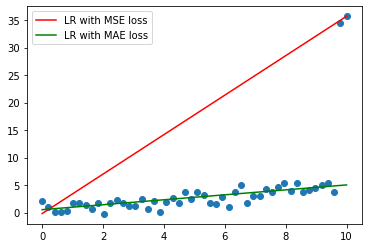

In [22]:
x = np.vstack([np.ones(N), X]).T
y_pred1 = x.dot(w1)
y_pred2 = x.dot(w2)
plt.scatter(x[:,1], Y)
plt.plot(x[:,1], y_pred1, label='LR with MSE loss',color='r')
plt.plot(x[:,1], y_pred2, label='LR with MAE loss',color='g')
plt.legend()
plt.show()